In [1]:
# Dependencies
import requests
import numpy as np
import pandas as pd
from census import Census
import matplotlib.pyplot as plt

# loading in data from census wrapper

In [2]:
# import us census api key
from config import census_key

# create an instance of the census library
c = Census(
    census_key,
    year = 2020
)

In [3]:
# using census wrapper to pull data
county_df = c.acs5.get(
    (
        "NAME",
        "B01003_001E",
        "B25064_001E",
        "B19301_001E"
    ),
    {'for': 'county'}
)

# convert to df
county_df = pd.DataFrame(county_df)

# renaming columns 
county_df = county_df.rename(
    columns = {
        "NAME": "County Name",
        "B01003_001E": "Total Population",
        "B25064_001E": "Median Gross Rent",
        "B19301_001E": "Income per capita"
    }
)

# rearranging columns
county_df = county_df[[
    "county",
    "County Name",
    "Total Population",
    "Median Gross Rent",
    "Income per capita"
]]
county_df = county_df.set_index('county')


# view
county_df

,County Name,Total Population,Median Gross Rent,Income per capita
county,,,,
001,"Autauga County, Alabama",55639.0,1011.0,29804.0
003,"Baldwin County, Alabama",218289.0,1032.0,33751.0
005,"Barbour County, Alabama",25026.0,587.0,20074.0
007,"Bibb County, Alabama",22374.0,693.0,22626.0
009,"Blount County, Alabama",57755.0,666.0,25457.0
...,...,...,...,...
129,"Renville County, Minnesota",14572.0,652.0,31243.0
135,"Roseau County, Minnesota",15259.0,647.0,31452.0
141,"Sherburne County, Minnesota",96015.0,982.0,36022.0


In [4]:
county_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3221 entries, 001 to 153
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   County Name        3221 non-null   object 
 1   Total Population   3221 non-null   float64
 2   Median Gross Rent  3221 non-null   float64
 3   Income per capita  3221 non-null   float64
dtypes: float64(3), object(1)
memory usage: 125.8+ KB


In [5]:
county_df.describe()

,Total Population,Median Gross Rent,Income per capita
count,3.221000e+03,3.221000e+03,3221.000000
mean,1.023983e+05,-2.068970e+06,28639.744800
std,3.282634e+05,3.709421e+07,7485.503016
min,1.170000e+02,-6.666667e+08,6936.000000
25%,1.112500e+04,6.400000e+02,24216.000000
50%,2.598100e+04,7.210000e+02,27937.000000
75%,6.696900e+04,8.570000e+02,32165.000000
max,1.004068e+07,2.435000e+03,78771.000000


## Exploring census data

Text(0.5, 1.0, 'Histogram of Total Population')

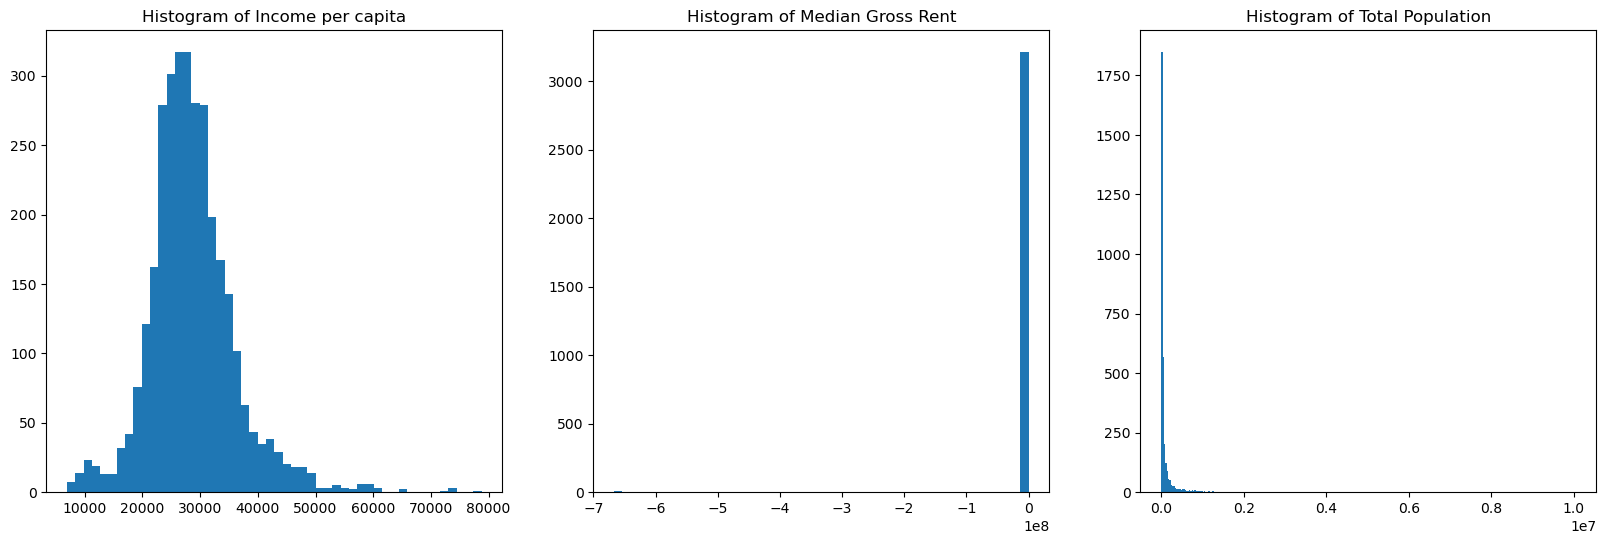

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, 
                                    figsize=(20,6))

ax1.hist(county_df['Income per capita'], bins=50)
ax1.set_title('Histogram of Income per capita')
ax2.hist(county_df['Median Gross Rent'], bins=50)
ax2.set_title('Histogram of Median Gross Rent')
#ax2.set_xlim(0,1000)
ax3.hist(county_df['Total Population'], bins=300)
ax3.set_title('Histogram of Total Population')
#ax3.set_xlim(0,2000000)

Investigating the weirdness of median gross rent

In [7]:
county_df['Median Gross Rent'].describe()

count    3.221000e+03
mean    -2.068970e+06
std      3.709421e+07
min     -6.666667e+08
25%      6.400000e+02
50%      7.210000e+02
75%      8.570000e+02
max      2.435000e+03
Name: Median Gross Rent, dtype: float64

In [8]:
county_df['Median Gross Rent'].median()

721.0

In [9]:
# checking whether there are cases with negative median gross rent
county_df.loc[county_df['Median Gross Rent']<0]

,County Name,Total Population,Median Gross Rent,Income per capita
county,,,,
009,"Daggett County, Utah",590.0,-666666666.0,27568.0
227,"Worth County, Missouri",2001.0,-666666666.0,26866.0
033,"Dolores County, Colorado",1896.0,-666666666.0,31290.0
057,"Jackson County, Colorado",1316.0,-666666666.0,30813.0
007,"Banner County, Nebraska",645.0,-666666666.0,30628.0
261,"Kenedy County, Texas",391.0,-666666666.0,15058.0
443,"Terrell County, Texas",903.0,-666666666.0,26056.0
119,"Sully County, South Dakota",1278.0,-666666666.0,40919.0
301,"Loving County, Texas",117.0,-666666666.0,37693.0


In [10]:
# removing cases where median gross rent is negative
county_df = county_df.loc[county_df['Median Gross Rent']>0]
county_df['Median Gross Rent'].describe()

count    3211.000000
mean      783.187792
std       240.172264
min       275.000000
25%       640.000000
50%       721.000000
75%       857.000000
max      2435.000000
Name: Median Gross Rent, dtype: float64

(array([  6.,  30.,  82., 205., 431., 701., 552., 370., 212., 153., 111.,
         98.,  69.,  38.,  43.,  21.,  27.,  12.,  12.,  11.,  10.,   6.,
          5.,   0.,   3.,   0.,   1.,   0.,   0.,   2.]),
 array([ 275.,  347.,  419.,  491.,  563.,  635.,  707.,  779.,  851.,
         923.,  995., 1067., 1139., 1211., 1283., 1355., 1427., 1499.,
        1571., 1643., 1715., 1787., 1859., 1931., 2003., 2075., 2147.,
        2219., 2291., 2363., 2435.]),
 <BarContainer object of 30 artists>)

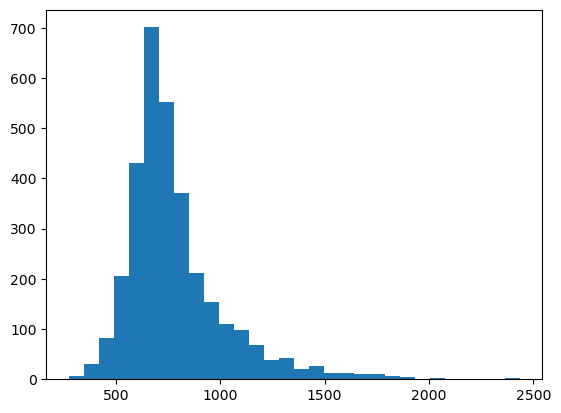

In [11]:
plt.hist(county_df['Median Gross Rent'], bins=30)

In [12]:
# checking for negative vlaues in total pop
county_df.loc[county_df['Total Population']<0]

,County Name,Total Population,Median Gross Rent,Income per capita
county,,,,


In [13]:
# checking for negative values in income per capita
county_df.loc[county_df['Income per capita']<0]

,County Name,Total Population,Median Gross Rent,Income per capita
county,,,,


Text(0.5, 0, 'Total Population')

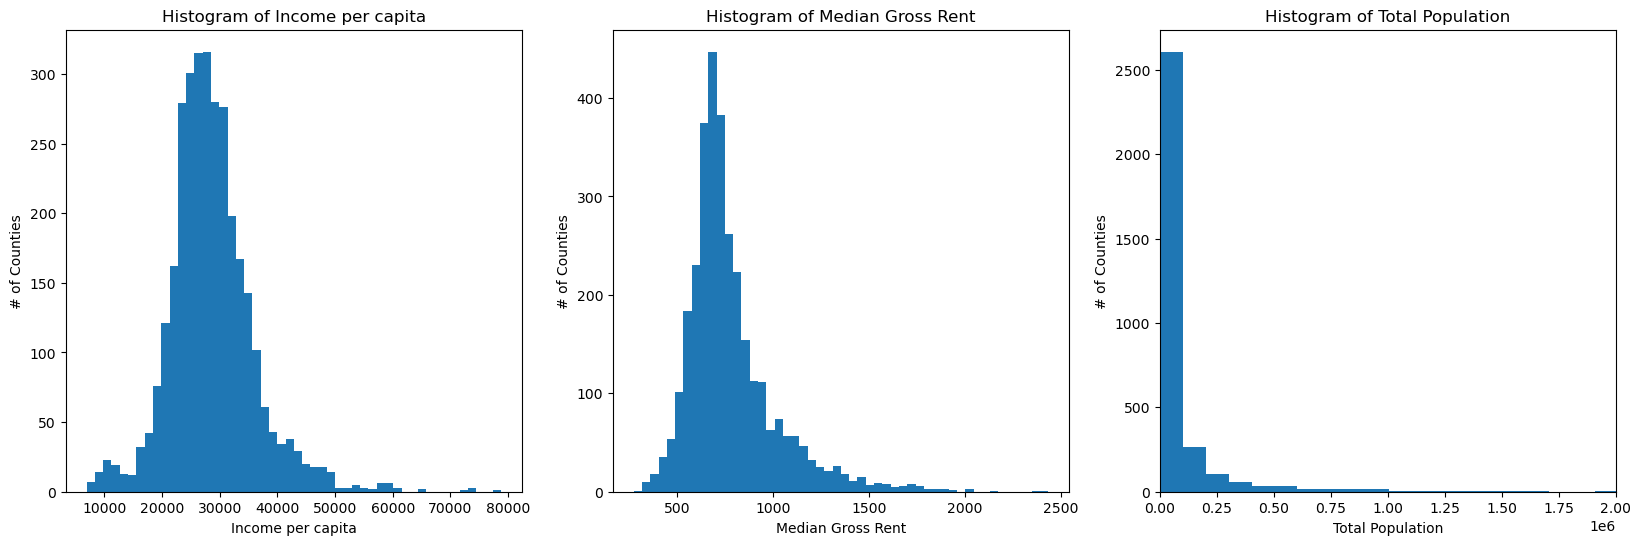

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, 
                                    figsize=(20,6))

ax1.hist(county_df['Income per capita'], bins=50)
ax1.set_title('Histogram of Income per capita')
ax1.set_ylabel('# of Counties')
ax1.set_xlabel('Income per capita')
ax2.hist(county_df['Median Gross Rent'], bins=50)
ax2.set_title('Histogram of Median Gross Rent')
ax2.set_ylabel('# of Counties')
ax2.set_xlabel('Median Gross Rent')
#ax2.set_xlim(0,1000)
ax3.hist(county_df['Total Population'], bins=100)
ax3.set_title('Histogram of Total Population')
ax3.set_ylabel('# of Counties')
ax3.set_xlim(0,2000000)
ax3.set_xlabel('Total Population')

## removing state name from county name column in census data

In [15]:
county_df.head()

,County Name,Total Population,Median Gross Rent,Income per capita
county,,,,
001,"Autauga County, Alabama",55639.0,1011.0,29804.0
003,"Baldwin County, Alabama",218289.0,1032.0,33751.0
005,"Barbour County, Alabama",25026.0,587.0,20074.0
007,"Bibb County, Alabama",22374.0,693.0,22626.0
009,"Blount County, Alabama",57755.0,666.0,25457.0


In [16]:
# in this cell I split the County Name column into two other columns named County and State
clean_county_df = county_df.copy(deep=True)

clean_county_df['County'] = county_df['County Name'].apply(lambda x: (x.split(", ")[0]).split(" ")[0])
clean_county_df['State'] = county_df['County Name'].apply(lambda x: x.split(", ")[1])
clean_county_df = clean_county_df[["County", 'State', 'Total Population', 'Median Gross Rent', 'Income per capita']]
clean_county_df

,County,State,Total Population,Median Gross Rent,Income per capita
county,,,,,
001,Autauga,Alabama,55639.0,1011.0,29804.0
003,Baldwin,Alabama,218289.0,1032.0,33751.0
005,Barbour,Alabama,25026.0,587.0,20074.0
007,Bibb,Alabama,22374.0,693.0,22626.0
009,Blount,Alabama,57755.0,666.0,25457.0
...,...,...,...,...,...
129,Renville,Minnesota,14572.0,652.0,31243.0
135,Roseau,Minnesota,15259.0,647.0,31452.0
141,Sherburne,Minnesota,96015.0,982.0,36022.0


In [17]:
clean_county_df['State'].unique()

array(['Alabama', 'Kentucky', 'Maine', 'Minnesota', 'Tennessee', 'Utah',
       'Vermont', 'Virginia', 'Missouri', 'Florida', 'Nebraska',
       'California', 'Nevada', 'New Hampshire', 'Louisiana', 'New York',
       'North Carolina', 'Arkansas', 'Washington', 'New Jersey',
       'Indiana', 'Massachusetts', 'Ohio', 'Connecticut',
       'District of Columbia', 'Alaska', 'Colorado', 'West Virginia',
       'Wisconsin', 'Delaware', 'Montana', 'Wyoming', 'Georgia',
       'Puerto Rico', 'Texas', 'Hawaii', 'Idaho', 'Illinois', 'Oklahoma',
       'Oregon', 'Rhode Island', 'Pennsylvania', 'South Carolina',
       'South Dakota', 'Iowa', 'Maryland', 'Michigan', 'Mississippi',
       'New Mexico', 'North Dakota', 'Arizona', 'Kansas'], dtype=object)

In [18]:
len(clean_county_df['State'].unique()) 

52

Looks like we have the correct number of states. I'm taking that as confirmation that this split worked. Now onto the land area data

# loading in land data

In [19]:
land_use_df = pd.read_excel("LND01.xls")[['Areaname', 'LND110210D']]
land_use_df

,Areaname,LND110210D
0,UNITED STATES,3531905.43
1,ALABAMA,50645.33
2,"Autauga, AL",594.44
3,"Baldwin, AL",1589.78
4,"Barbour, AL",884.88
...,...,...
3193,"Sweetwater, WY",10426.65
3194,"Teton, WY",3995.38
3195,"Uinta, WY",2081.26
3196,"Washakie, WY",2238.55


## removing the country and state rows from the land use dataframe

In [20]:
# in this cell I'm figuring out how to remove the state and country rows from the land_df
# these rows need to be removed prior to splitting the county column into county and state



# to do the above goal, first I needed a list of the state names in all caps
state_names = clean_county_df['State'].apply(lambda x: x.upper())
print(state_names.unique())
print(len(state_names.unique()))

# now I remove all rows that have any of the state names in their "Areaname" column
# this effectively gets rid of all the rows that are states
land_use_df = land_use_df[~land_use_df['Areaname'].isin(state_names)]

# now I remove the row with United States in the "Areaname" column
land_use_df = land_use_df.drop(0)
land_use_df = land_use_df.reset_index(drop=True)


land_use_df

['ALABAMA' 'KENTUCKY' 'MAINE' 'MINNESOTA' 'TENNESSEE' 'UTAH' 'VERMONT'
 'VIRGINIA' 'MISSOURI' 'FLORIDA' 'NEBRASKA' 'CALIFORNIA' 'NEVADA'
 'NEW HAMPSHIRE' 'LOUISIANA' 'NEW YORK' 'NORTH CAROLINA' 'ARKANSAS'
 'WASHINGTON' 'NEW JERSEY' 'INDIANA' 'MASSACHUSETTS' 'OHIO' 'CONNECTICUT'
 'DISTRICT OF COLUMBIA' 'ALASKA' 'COLORADO' 'WEST VIRGINIA' 'WISCONSIN'
 'DELAWARE' 'MONTANA' 'WYOMING' 'GEORGIA' 'PUERTO RICO' 'TEXAS' 'HAWAII'
 'IDAHO' 'ILLINOIS' 'OKLAHOMA' 'OREGON' 'RHODE ISLAND' 'PENNSYLVANIA'
 'SOUTH CAROLINA' 'SOUTH DAKOTA' 'IOWA' 'MARYLAND' 'MICHIGAN'
 'MISSISSIPPI' 'NEW MEXICO' 'NORTH DAKOTA' 'ARIZONA' 'KANSAS']
52


,Areaname,LND110210D
0,"Autauga, AL",594.44
1,"Baldwin, AL",1589.78
2,"Barbour, AL",884.88
3,"Bibb, AL",622.58
4,"Blount, AL",644.78
...,...,...
3141,"Sweetwater, WY",10426.65
3142,"Teton, WY",3995.38
3143,"Uinta, WY",2081.26
3144,"Washakie, WY",2238.55


In [21]:
# I learned later that that district of columbia row needed to be removed individually...
#...this was because it wasn't in all caps and so didn't get removed by the above code...
#...in the cell above this one

land_use_df.loc[land_use_df['Areaname']=='District of Columbia']

land_use_df = land_use_df.drop(319)
land_use_df = land_use_df.reset_index(drop=True)
land_use_df

,Areaname,LND110210D
0,"Autauga, AL",594.44
1,"Baldwin, AL",1589.78
2,"Barbour, AL",884.88
3,"Bibb, AL",622.58
4,"Blount, AL",644.78
...,...,...
3140,"Sweetwater, WY",10426.65
3141,"Teton, WY",3995.38
3142,"Uinta, WY",2081.26
3143,"Washakie, WY",2238.55


## removing state abbreviation from county name column in land use data

In [22]:
# making copy of the land_use_df
clean_land_df = land_use_df.copy(deep=True)


clean_land_df['Areaname'] = land_use_df['Areaname'].apply(lambda x: x.split(", ")[0])



clean_land_df['State'] = land_use_df['Areaname'].apply(lambda x: x.split(", ")[1])
clean_land_df = clean_land_df.reset_index(drop=True)
clean_land_df

,Areaname,LND110210D,State
0,Autauga,594.44,AL
1,Baldwin,1589.78,AL
2,Barbour,884.88,AL
3,Bibb,622.58,AL
4,Blount,644.78,AL
...,...,...,...
3140,Sweetwater,10426.65,WY
3141,Teton,3995.38,WY
3142,Uinta,2081.26,WY
3143,Washakie,2238.55,WY


In [23]:
# this cell was used to identify the problem with the district of columbia

e_count = 0
e_indices = []


for i in land_use_df['Areaname']:
    try:
        print(i.split(", ")[1])
    except:
        e_count += 1
        e_indices.append(i)

print(f"there are {e_count} errors")
print(f"the errors are located at indices {e_indices}")

AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
AR
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CO
CT
CT
CT
CT
CT
CT
CT
CT
DE
DE
DE
FL
FL
FL
FL
FL
FL
FL
FL
FL
FL
FL
FL
FL
FL
F

## renaming state abv to full state name in land data

In [24]:
clean_land_df

,Areaname,LND110210D,State
0,Autauga,594.44,AL
1,Baldwin,1589.78,AL
2,Barbour,884.88,AL
3,Bibb,622.58,AL
4,Blount,644.78,AL
...,...,...,...
3140,Sweetwater,10426.65,WY
3141,Teton,3995.38,WY
3142,Uinta,2081.26,WY
3143,Washakie,2238.55,WY


In [25]:
# retreiving state abbreviations 
state_abvs = clean_land_df['State'].unique()
state_abvs

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
       'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
       'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [26]:
# for each item in the state series, rename it to the full state name
clean_land_df['State'] = clean_land_df['State'].replace({"AL": "Alabama",
                                                         "AK": "Alaska",
                                                         "AZ": "Arizona",
                                                         "AR": "Arkansas",
                                                         "CA": "California",
                                                         "CO": "Colorado",
                                                         "CT": "Connecticut",
                                                         "DE": "Delaware",
                                                         "FL": "Florida",
                                                         "GA": "Georgia",
                                                         "HI": "Hawaii",
                                                         "ID": "Idaho",
                                                         "IL": "Illinois",
                                                         "IN": "Indiana",
                                                         "IA": "Iowa",
                                                         "KS": "Kansas",
                                                         "KY": "Kentucky",
                                                         "LA": "Louisiana",
                                                         "ME": "Maine",
                                                         "MD": "Maryland",
                                                         "MA": "Massachusetts",
                                                         "MI": "Michigan",
                                                         "MN": "Minnesota",
                                                         "MS": "Mississippi",
                                                         "MO": "Missouri",
                                                         "MT": "Montana",
                                                         "NE": "Nebraska",
                                                         "NV": "Nevada",
                                                         "NH": "New Hampshire",
                                                         "NJ": "New Jersey",
                                                         "NM": "New Mexico",
                                                         "NY": "New York",
                                                         "NC": "North Carolina",
                                                         "ND": "North Dakota",
                                                         "OH": "Ohio",
                                                         "OK": "Oklahoma",
                                                         "OR": "Oregon",
                                                         "PA": "Pennsylvania",
                                                         "RI": "Rhode Island",
                                                         "SC": "South Carolina",
                                                         "SD": "South Dakota",
                                                         "TN": "Tennessee",
                                                         "TX": "Texas",
                                                         "UT": "Utah",
                                                         "VT": "Vermont",
                                                         "VA": "Virginia",
                                                         "WA": "Washington",
                                                         "WV": "West Virginia",
                                                         "WI": "Wisconsin",
                                                         "WY": "Wyoming"})

clean_land_df

,Areaname,LND110210D,State
0,Autauga,594.44,Alabama
1,Baldwin,1589.78,Alabama
2,Barbour,884.88,Alabama
3,Bibb,622.58,Alabama
4,Blount,644.78,Alabama
...,...,...,...
3140,Sweetwater,10426.65,Wyoming
3141,Teton,3995.38,Wyoming
3142,Uinta,2081.26,Wyoming
3143,Washakie,2238.55,Wyoming


## renaming both county name columns in both dataframes to County Name

In [27]:
clean_county_df

,County,State,Total Population,Median Gross Rent,Income per capita
county,,,,,
001,Autauga,Alabama,55639.0,1011.0,29804.0
003,Baldwin,Alabama,218289.0,1032.0,33751.0
005,Barbour,Alabama,25026.0,587.0,20074.0
007,Bibb,Alabama,22374.0,693.0,22626.0
009,Blount,Alabama,57755.0,666.0,25457.0
...,...,...,...,...,...
129,Renville,Minnesota,14572.0,652.0,31243.0
135,Roseau,Minnesota,15259.0,647.0,31452.0
141,Sherburne,Minnesota,96015.0,982.0,36022.0


In [28]:
clean_land_df

,Areaname,LND110210D,State
0,Autauga,594.44,Alabama
1,Baldwin,1589.78,Alabama
2,Barbour,884.88,Alabama
3,Bibb,622.58,Alabama
4,Blount,644.78,Alabama
...,...,...,...
3140,Sweetwater,10426.65,Wyoming
3141,Teton,3995.38,Wyoming
3142,Uinta,2081.26,Wyoming
3143,Washakie,2238.55,Wyoming


In [29]:
clean_land_df = clean_land_df.rename(columns={"Areaname": "County",
                                              "LND110210D" :"Land Area (m^2)"})
clean_land_df

,County,Land Area (m^2),State
0,Autauga,594.44,Alabama
1,Baldwin,1589.78,Alabama
2,Barbour,884.88,Alabama
3,Bibb,622.58,Alabama
4,Blount,644.78,Alabama
...,...,...,...
3140,Sweetwater,10426.65,Wyoming
3141,Teton,3995.38,Wyoming
3142,Uinta,2081.26,Wyoming
3143,Washakie,2238.55,Wyoming


# merging land use into census data

In [30]:
full_county_df = pd.merge(clean_county_df, clean_land_df, how = 'inner', on=["County", "State"])
full_county_df

,County,State,Total Population,Median Gross Rent,Income per capita,Land Area (m^2)
0,Autauga,Alabama,55639.0,1011.0,29804.0,594.44
1,Baldwin,Alabama,218289.0,1032.0,33751.0,1589.78
2,Barbour,Alabama,25026.0,587.0,20074.0,884.88
3,Bibb,Alabama,22374.0,693.0,22626.0,622.58
4,Blount,Alabama,57755.0,666.0,25457.0,644.78
...,...,...,...,...,...,...
2938,Renville,Minnesota,14572.0,652.0,31243.0,982.91
2939,Roseau,Minnesota,15259.0,647.0,31452.0,1671.60
2940,Sherburne,Minnesota,96015.0,982.0,36022.0,432.92
2941,Steele,Minnesota,36710.0,802.0,34648.0,429.65


# Calculating population density

In [31]:
full_county_df['Population Density (per m^2)'] = full_county_df['Total Population'] / full_county_df['Land Area (m^2)']


In [32]:
full_county_df.columns

Index(['County', 'State', 'Total Population', 'Median Gross Rent',
       'Income per capita', 'Land Area (m^2)', 'Population Density (per m^2)'],
      dtype='object')

In [33]:
full_county_df = full_county_df[['County', 'State', 'Total Population',
                                 'Land Area (m^2)', 'Population Density (per m^2)',
                                 'Median Gross Rent', 'Income per capita']]
full_county_df

,County,State,Total Population,Land Area (m^2),Population Density (per m^2),Median Gross Rent,Income per capita
0,Autauga,Alabama,55639.0,594.44,93.599018,1011.0,29804.0
1,Baldwin,Alabama,218289.0,1589.78,137.307678,1032.0,33751.0
2,Barbour,Alabama,25026.0,884.88,28.281801,587.0,20074.0
3,Bibb,Alabama,22374.0,622.58,35.937550,693.0,22626.0
4,Blount,Alabama,57755.0,644.78,89.573188,666.0,25457.0
...,...,...,...,...,...,...,...
2938,Renville,Minnesota,14572.0,982.91,14.825365,652.0,31243.0
2939,Roseau,Minnesota,15259.0,1671.60,9.128380,647.0,31452.0
2940,Sherburne,Minnesota,96015.0,432.92,221.784625,982.0,36022.0
2941,Steele,Minnesota,36710.0,429.65,85.441639,802.0,34648.0


# loading in Gina's data

In [83]:
eduEmp_df = pd.read_csv("gina_data.csv")
eduEmp_df

,State,Area Name,"Less Than A High School Diploma, 2017-21","High School Diploma Only, 2017-21","Some College Or Associate'S Degree, 2017-21","Bachelor'S Degree Or Higher, 2017-21","Percent Of Adults With Less Than A High School Diploma, 2017-21","Percent Of Adults With A High School Diploma Only, 2017-21","Percent Of Adults Completing Some College Or Associate'S Degree, 2017-21","Percent Of Adults With A Bachelor'S Degree Or Higher, 2017-21",Estimate Of People Of All Ages In Poverty 2020,Estimated Percent Of People Of All Ages In Poverty 2020,Employed_2020,Unemployed_2020,Unemployment_Rate_2020,Median_Household_Income_2020,"County Household Median Income As A Percent Of The State Total Median Household Income, 2020"
0,AL,Autauga County,4126.0,12977.0,11367.0,11144.0,10.415510,32.758621,28.694401,28.131469,6242.0,11.2,24985.0,1420.0,5.4,67565.0,125.217762
1,AL,Baldwin County,14555.0,44342.0,50518.0,52562.0,8.985844,27.375492,31.188379,32.450286,20189.0,8.9,92751.0,6159.0,6.2,71135.0,131.834019
2,AL,Barbour County,4378.0,6600.0,5010.0,2007.0,24.328980,36.676855,27.841067,11.153098,5548.0,25.5,8004.0,676.0,7.8,38866.0,72.030097
3,AL,Bibb County,3125.0,7052.0,3967.0,1913.0,19.461917,43.918540,24.705736,11.913807,3549.0,17.8,8073.0,639.0,7.3,50907.0,94.345602
4,AL,Blount County,6650.0,14284.0,13673.0,6061.0,16.351923,35.123439,33.621029,14.903610,7525.0,13.1,23973.0,1143.0,4.6,55203.0,102.307350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,WY,Sublette County,303.0,1969.0,2206.0,1623.0,4.966399,32.273398,36.158007,26.602196,610.0,6.2,18998.0,1505.0,7.3,70583.0,104.903097
3001,WY,Sweetwater County,2029.0,9069.0,11324.0,5394.0,7.294363,32.603538,40.710383,19.391717,3187.0,7.6,14251.0,887.0,5.9,92488.0,137.459128
3002,WY,Teton County,701.0,2984.0,3755.0,10219.0,3.969647,16.897899,21.263945,57.868509,1207.0,5.2,8532.0,570.0,6.3,71246.0,105.888473
3003,WY,Uinta County,851.0,4820.0,5186.0,2376.0,6.430892,36.424091,39.189904,17.955112,1697.0,8.5,3739.0,206.0,5.2,58532.0,86.992450


## turning state abv. into state name

In [84]:
c1_eduEmp_df = eduEmp_df.copy(deep=True)

In [85]:
c1_eduEmp_df['State'].unique() # missing alaska and louisiana

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID',
       'IL', 'IN', 'IA', 'KS', 'KY', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS',
       'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA',
       'WA', 'WV', 'WI', 'WY'], dtype=object)

In [86]:
# for each item in the state series, rename it to the full state name
c1_eduEmp_df['State'] = eduEmp_df['State'].replace({"AL": "Alabama",
                                                "AZ": "Arizona",
                                                "AR": "Arkansas",
                                                "CA": "California",
                                                "CO": "Colorado",
                                                "CT": "Connecticut",
                                                "DE": "Delaware",
                                                "FL": "Florida",
                                                "GA": "Georgia",
                                                "HI": "Hawaii",
                                                "ID": "Idaho",
                                                "IL": "Illinois",
                                                "IN": "Indiana",
                                                "IA": "Iowa",
                                                "KS": "Kansas",
                                                "KY": "Kentucky",
                                                "ME": "Maine",
                                                "MD": "Maryland",
                                                "MA": "Massachusetts",
                                                "MI": "Michigan",
                                                "MN": "Minnesota",
                                                "MS": "Mississippi",
                                                "MO": "Missouri",
                                                "MT": "Montana",
                                                "NE": "Nebraska",
                                                "NV": "Nevada",
                                                "NH": "New Hampshire",
                                                "NJ": "New Jersey",
                                                "NM": "New Mexico",
                                                "NY": "New York",
                                                "NC": "North Carolina",
                                                "ND": "North Dakota",
                                                "OH": "Ohio",
                                                "OK": "Oklahoma",
                                                "OR": "Oregon",
                                                "PA": "Pennsylvania",
                                                "RI": "Rhode Island",
                                                "SC": "South Carolina",
                                                "SD": "South Dakota",
                                                "TN": "Tennessee",
                                                "TX": "Texas",
                                                "UT": "Utah",
                                                "VT": "Vermont",
                                                "VA": "Virginia",
                                                "WA": "Washington",
                                                "WV": "West Virginia",
                                                "WI": "Wisconsin",
                                                "WY": "Wyoming"})

c1_eduEmp_df # trying out a new notation

,State,Area Name,"Less Than A High School Diploma, 2017-21","High School Diploma Only, 2017-21","Some College Or Associate'S Degree, 2017-21","Bachelor'S Degree Or Higher, 2017-21","Percent Of Adults With Less Than A High School Diploma, 2017-21","Percent Of Adults With A High School Diploma Only, 2017-21","Percent Of Adults Completing Some College Or Associate'S Degree, 2017-21","Percent Of Adults With A Bachelor'S Degree Or Higher, 2017-21",Estimate Of People Of All Ages In Poverty 2020,Estimated Percent Of People Of All Ages In Poverty 2020,Employed_2020,Unemployed_2020,Unemployment_Rate_2020,Median_Household_Income_2020,"County Household Median Income As A Percent Of The State Total Median Household Income, 2020"
0,Alabama,Autauga County,4126.0,12977.0,11367.0,11144.0,10.415510,32.758621,28.694401,28.131469,6242.0,11.2,24985.0,1420.0,5.4,67565.0,125.217762
1,Alabama,Baldwin County,14555.0,44342.0,50518.0,52562.0,8.985844,27.375492,31.188379,32.450286,20189.0,8.9,92751.0,6159.0,6.2,71135.0,131.834019
2,Alabama,Barbour County,4378.0,6600.0,5010.0,2007.0,24.328980,36.676855,27.841067,11.153098,5548.0,25.5,8004.0,676.0,7.8,38866.0,72.030097
3,Alabama,Bibb County,3125.0,7052.0,3967.0,1913.0,19.461917,43.918540,24.705736,11.913807,3549.0,17.8,8073.0,639.0,7.3,50907.0,94.345602
4,Alabama,Blount County,6650.0,14284.0,13673.0,6061.0,16.351923,35.123439,33.621029,14.903610,7525.0,13.1,23973.0,1143.0,4.6,55203.0,102.307350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,Wyoming,Sublette County,303.0,1969.0,2206.0,1623.0,4.966399,32.273398,36.158007,26.602196,610.0,6.2,18998.0,1505.0,7.3,70583.0,104.903097
3001,Wyoming,Sweetwater County,2029.0,9069.0,11324.0,5394.0,7.294363,32.603538,40.710383,19.391717,3187.0,7.6,14251.0,887.0,5.9,92488.0,137.459128
3002,Wyoming,Teton County,701.0,2984.0,3755.0,10219.0,3.969647,16.897899,21.263945,57.868509,1207.0,5.2,8532.0,570.0,6.3,71246.0,105.888473
3003,Wyoming,Uinta County,851.0,4820.0,5186.0,2376.0,6.430892,36.424091,39.189904,17.955112,1697.0,8.5,3739.0,206.0,5.2,58532.0,86.992450


## trimming "county" from the county column

In [87]:
c2_eduEmp_df = c1_eduEmp_df.copy(deep=True)

In [88]:
c2_eduEmp_df['Area Name'].sample(50)

121        Lincoln County
949       Stafford County
2905         Wayne County
2368     Henderson County
1898         Burke County
449        Lumpkin County
826     Montgomery County
2854       Whitman County
2973        Vernon County
2977    Washington County
2077     McCurtain County
287           Kent County
1854         Moore County
2980      Waushara County
1790       Wyoming County
2654        Upshur County
1012     Henderson County
178       Mariposa County
1570         Cedar County
1283          Rice County
1564          Boyd County
2853       Whatcom County
2799    Rockbridge County
2957         Pepin County
532          Camas County
435         Jasper County
2551         Jones County
2178     Jefferson County
2286    Fall River County
1392        Barton County
1345           Lee County
2531     Henderson County
771        Carroll County
1911        Griggs County
1385     Yalobusha County
230          Delta County
297      Charlotte County
869          Clark County
2560        

In [89]:
# need to remove county - gonna try to use .map
c2_eduEmp_df['Area Name'] = c1_eduEmp_df['Area Name'].map(lambda x: x.rstrip('County'))
c2_eduEmp_df['Area Name'] = c2_eduEmp_df['Area Name'].map(lambda x: x.rstrip(' '))
c2_eduEmp_df

,State,Area Name,"Less Than A High School Diploma, 2017-21","High School Diploma Only, 2017-21","Some College Or Associate'S Degree, 2017-21","Bachelor'S Degree Or Higher, 2017-21","Percent Of Adults With Less Than A High School Diploma, 2017-21","Percent Of Adults With A High School Diploma Only, 2017-21","Percent Of Adults Completing Some College Or Associate'S Degree, 2017-21","Percent Of Adults With A Bachelor'S Degree Or Higher, 2017-21",Estimate Of People Of All Ages In Poverty 2020,Estimated Percent Of People Of All Ages In Poverty 2020,Employed_2020,Unemployed_2020,Unemployment_Rate_2020,Median_Household_Income_2020,"County Household Median Income As A Percent Of The State Total Median Household Income, 2020"
0,Alabama,Autauga,4126.0,12977.0,11367.0,11144.0,10.415510,32.758621,28.694401,28.131469,6242.0,11.2,24985.0,1420.0,5.4,67565.0,125.217762
1,Alabama,Baldwin,14555.0,44342.0,50518.0,52562.0,8.985844,27.375492,31.188379,32.450286,20189.0,8.9,92751.0,6159.0,6.2,71135.0,131.834019
2,Alabama,Barbour,4378.0,6600.0,5010.0,2007.0,24.328980,36.676855,27.841067,11.153098,5548.0,25.5,8004.0,676.0,7.8,38866.0,72.030097
3,Alabama,Bibb,3125.0,7052.0,3967.0,1913.0,19.461917,43.918540,24.705736,11.913807,3549.0,17.8,8073.0,639.0,7.3,50907.0,94.345602
4,Alabama,Blount,6650.0,14284.0,13673.0,6061.0,16.351923,35.123439,33.621029,14.903610,7525.0,13.1,23973.0,1143.0,4.6,55203.0,102.307350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,Wyoming,Sublette,303.0,1969.0,2206.0,1623.0,4.966399,32.273398,36.158007,26.602196,610.0,6.2,18998.0,1505.0,7.3,70583.0,104.903097
3001,Wyoming,Sweetwater,2029.0,9069.0,11324.0,5394.0,7.294363,32.603538,40.710383,19.391717,3187.0,7.6,14251.0,887.0,5.9,92488.0,137.459128
3002,Wyoming,Teton,701.0,2984.0,3755.0,10219.0,3.969647,16.897899,21.263945,57.868509,1207.0,5.2,8532.0,570.0,6.3,71246.0,105.888473
3003,Wyoming,Uinta,851.0,4820.0,5186.0,2376.0,6.430892,36.424091,39.189904,17.955112,1697.0,8.5,3739.0,206.0,5.2,58532.0,86.992450


In [90]:
full_eduEmp_df = c2_eduEmp_df.copy(deep=True)

# time to merge everything? 

if anything goes wrong I guess we'll see a loss of a lot of cases. 

So we need to merge together the `full_county_df` and `full_eduEmp_df` on the state and county columns. The steps are below:
1. rename "Area Name" to "County" in `full_eduEmp_df`
2. perform an inner merge `full_county_df` and `full_eduEmp_df` on "County" and "State" columns 

In [91]:
full_eduEmp_df.columns

Index(['State', 'Area Name', 'Less Than A High School Diploma, 2017-21',
       'High School Diploma Only, 2017-21',
       'Some College Or Associate'S Degree, 2017-21',
       'Bachelor'S Degree Or Higher, 2017-21',
       'Percent Of Adults With Less Than A High School Diploma, 2017-21',
       'Percent Of Adults With A High School Diploma Only, 2017-21',
       'Percent Of Adults Completing Some College Or Associate'S Degree, 2017-21',
       'Percent Of Adults With A Bachelor'S Degree Or Higher, 2017-21',
       'Estimate Of People Of All Ages In Poverty 2020',
       'Estimated Percent Of People Of All Ages In Poverty 2020',
       'Employed_2020', 'Unemployed_2020', 'Unemployment_Rate_2020',
       'Median_Household_Income_2020',
       'County Household Median Income As A Percent Of The State Total Median Household Income, 2020'],
      dtype='object')

In [92]:
full_eduEmp_df = full_eduEmp_df.rename(columns={"Area Name": "County"})
full_eduEmp_df = full_eduEmp_df[['County', 'State', 'Less Than A High School Diploma, 2017-21',
                                'High School Diploma Only, 2017-21',
                                "Some College Or Associate'S Degree, 2017-21",
                                "Bachelor'S Degree Or Higher, 2017-21",
                                'Percent Of Adults With Less Than A High School Diploma, 2017-21',
                                'Percent Of Adults With A High School Diploma Only, 2017-21',
                                "Percent Of Adults Completing Some College Or Associate'S Degree, 2017-21",
                                "Percent Of Adults With A Bachelor'S Degree Or Higher, 2017-21",
                                'Estimate Of People Of All Ages In Poverty 2020',
                                'Estimated Percent Of People Of All Ages In Poverty 2020',
                                'Employed_2020', 'Unemployed_2020', 'Unemployment_Rate_2020',
                                'Median_Household_Income_2020',
                                'County Household Median Income As A Percent Of The State Total Median Household Income, 2020']]
full_eduEmp_df.head()

,County,State,"Less Than A High School Diploma, 2017-21","High School Diploma Only, 2017-21","Some College Or Associate'S Degree, 2017-21","Bachelor'S Degree Or Higher, 2017-21","Percent Of Adults With Less Than A High School Diploma, 2017-21","Percent Of Adults With A High School Diploma Only, 2017-21","Percent Of Adults Completing Some College Or Associate'S Degree, 2017-21","Percent Of Adults With A Bachelor'S Degree Or Higher, 2017-21",Estimate Of People Of All Ages In Poverty 2020,Estimated Percent Of People Of All Ages In Poverty 2020,Employed_2020,Unemployed_2020,Unemployment_Rate_2020,Median_Household_Income_2020,"County Household Median Income As A Percent Of The State Total Median Household Income, 2020"
0,Autauga,Alabama,4126.0,12977.0,11367.0,11144.0,10.415510,32.758621,28.694401,28.131469,6242.0,11.2,24985.0,1420.0,5.4,67565.0,125.217762
1,Baldwin,Alabama,14555.0,44342.0,50518.0,52562.0,8.985844,27.375492,31.188379,32.450286,20189.0,8.9,92751.0,6159.0,6.2,71135.0,131.834019
2,Barbour,Alabama,4378.0,6600.0,5010.0,2007.0,24.328980,36.676855,27.841067,11.153098,5548.0,25.5,8004.0,676.0,7.8,38866.0,72.030097
3,Bibb,Alabama,3125.0,7052.0,3967.0,1913.0,19.461917,43.918540,24.705736,11.913807,3549.0,17.8,8073.0,639.0,7.3,50907.0,94.345602
4,Blount,Alabama,6650.0,14284.0,13673.0,6061.0,16.351923,35.123439,33.621029,14.903610,7525.0,13.1,23973.0,1143.0,4.6,55203.0,102.307350


In [93]:
full_eduEmp_df['County'].unique()

array(['Autauga', 'Baldwin', 'Barbour', ..., 'Sweetwater', 'Uinta',
       'Washakie'], dtype=object)

In [94]:
complete_df = pd.merge(full_county_df, full_eduEmp_df, how='inner', on=["County", "State"])
complete_df

,County,State,Total Population,Land Area (m^2),Population Density (per m^2),Median Gross Rent,Income per capita,"Less Than A High School Diploma, 2017-21","High School Diploma Only, 2017-21","Some College Or Associate'S Degree, 2017-21",...,"Percent Of Adults With A High School Diploma Only, 2017-21","Percent Of Adults Completing Some College Or Associate'S Degree, 2017-21","Percent Of Adults With A Bachelor'S Degree Or Higher, 2017-21",Estimate Of People Of All Ages In Poverty 2020,Estimated Percent Of People Of All Ages In Poverty 2020,Employed_2020,Unemployed_2020,Unemployment_Rate_2020,Median_Household_Income_2020,"County Household Median Income As A Percent Of The State Total Median Household Income, 2020"
0,Autauga,Alabama,55639.0,594.44,93.599018,1011.0,29804.0,4126.0,12977.0,11367.0,...,32.758621,28.694401,28.131469,6242.0,11.2,24985.0,1420.0,5.4,67565.0,125.217762
1,Baldwin,Alabama,218289.0,1589.78,137.307678,1032.0,33751.0,14555.0,44342.0,50518.0,...,27.375492,31.188379,32.450286,20189.0,8.9,92751.0,6159.0,6.2,71135.0,131.834019
2,Barbour,Alabama,25026.0,884.88,28.281801,587.0,20074.0,4378.0,6600.0,5010.0,...,36.676855,27.841067,11.153098,5548.0,25.5,8004.0,676.0,7.8,38866.0,72.030097
3,Bibb,Alabama,22374.0,622.58,35.937550,693.0,22626.0,3125.0,7052.0,3967.0,...,43.918540,24.705736,11.913807,3549.0,17.8,8073.0,639.0,7.3,50907.0,94.345602
4,Blount,Alabama,57755.0,644.78,89.573188,666.0,25457.0,6650.0,14284.0,13673.0,...,35.123439,33.621029,14.903610,7525.0,13.1,23973.0,1143.0,4.6,55203.0,102.307350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,Renville,Minnesota,14572.0,982.91,14.825365,652.0,31243.0,969.0,3732.0,3928.0,...,36.331776,38.239875,15.994938,1213.0,8.6,35481.0,2040.0,5.4,74301.0,98.426261
2847,Roseau,Minnesota,15259.0,1671.60,9.128380,647.0,31452.0,689.0,3788.0,3882.0,...,36.248804,37.148325,20.009569,1087.0,7.3,94186.0,7480.0,7.4,57972.0,76.795295
2848,Sherburne,Minnesota,96015.0,432.92,221.784625,982.0,36022.0,3615.0,17393.0,25878.0,...,27.505337,40.923539,25.854353,4279.0,4.4,7869.0,482.0,5.8,61225.0,81.104532
2849,Steele,Minnesota,36710.0,429.65,85.441639,802.0,34648.0,2101.0,7511.0,8530.0,...,29.833969,33.881474,27.939307,2622.0,7.3,5283.0,183.0,3.3,68234.0,90.389328


the merge is complete. 

In [95]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2851 entries, 0 to 2850
Data columns (total 22 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   County                                                                                        2851 non-null   object 
 1   State                                                                                         2851 non-null   object 
 2   Total Population                                                                              2851 non-null   float64
 3   Land Area (m^2)                                                                               2851 non-null   float64
 4   Population Density (per m^2)                                                                  2851 non-null   float64
 5   Median Gross Rent          